In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
dataset = pd.read_csv('heart.csv')

dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
dataset.describe(exclude='number')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


### Selecting our target.

In [6]:
X = dataset.iloc[:, :-1]

y = dataset.iloc[:, -1]

In [8]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [9]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

### Splitting the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Encoding the categorical colmuns

In [11]:
enc = OneHotEncoder()

X_train_enc = enc.fit_transform(X_train[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])

X_test_enc = enc.transform(X_test[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']])

In [12]:
enc.categories_[0]

array(['F', 'M'], dtype=object)

In [13]:
enc.get_feature_names()

array(['x0_F', 'x0_M', 'x1_ASY', 'x1_ATA', 'x1_NAP', 'x1_TA', 'x2_LVH',
       'x2_Normal', 'x2_ST', 'x3_N', 'x3_Y', 'x4_Down', 'x4_Flat',
       'x4_Up'], dtype=object)

In [14]:
# add back encoded columns to dataframe
X_train[enc.get_feature_names()] = X_train_enc.toarray()
X_test[enc.get_feature_names()] = X_test_enc.toarray()

<ipython-input-14-3adce797b924>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[enc.get_feature_names()] = X_train_enc.toarray()
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-14-3adce797b924>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [15]:
X_train.drop(columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], inplace=True)
X_test.drop(columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,x0_F,x0_M,x1_ASY,x1_ATA,x1_NAP,x1_TA,x2_LVH,x2_Normal,x2_ST,x3_N,x3_Y,x4_Down,x4_Flat,x4_Up
378,70,140,0,1,157,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
356,46,115,0,0,113,1.5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
738,65,160,360,0,151,0.8,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
85,66,140,139,0,94,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
427,59,140,0,0,117,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,54,110,239,0,126,2.8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
192,48,130,245,0,160,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
629,57,128,303,0,159,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
559,64,134,273,0,102,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic regression model:

In [20]:
classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [26]:
accuracy_score(y_test,y_pred,normalize=True)

0.8260869565217391

In [27]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[56, 21],
       [11, 96]], dtype=int64)

In [38]:
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        77
           1       0.82      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184



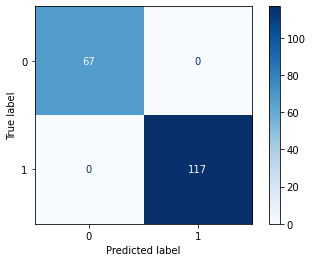

In [28]:
plot_confusion_matrix(classifier, X=X_test, y_true=y_pred, cmap='Blues')

### Tuning the logistic regression model using PCA:

In [29]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(X_train)

In [32]:
pca = PCA()
pca.fit(scaled_df)

PCA()

In [43]:
pipe = make_pipeline(
    PCA(n_components= 6),
    LogisticRegression()
)

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8478260869565217

In [44]:
pred = pipe.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.86      0.89      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



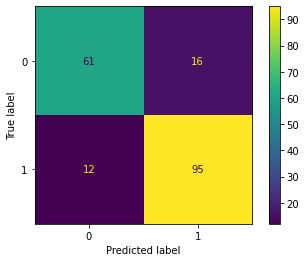

In [45]:
plot_confusion_matrix(pipe, X_test, y_test)
plt.grid(False);

### Desicion tree model:

In [46]:
scaler = StandardScaler()
# Fit & transform data.
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [47]:
class_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
class_tree.fit(X_train_sc, y_train)
preds_class = class_tree.predict(X_test_sc)

In [48]:
val_train = round(class_tree.score(X_train_sc, y_train),2)*100
val_test = round(class_tree.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 89.0%
Test Set Accuracy: 82.0%


In [50]:
pred = class_tree.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        77
           1       0.83      0.86      0.84       107

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.82      0.81       184



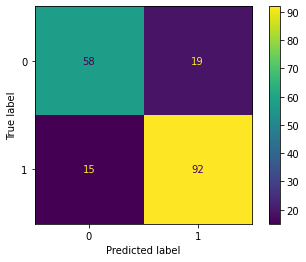

In [51]:
plot_confusion_matrix(class_tree, X_test_sc, y_test);

### Tuning the model using Grid search:

In [54]:
# Classification
param_grid = {
    "criterion": ["gini", "entropy"], 
    "max_depth": [2,4,6]
}
grid = GridSearchCV(
    class_tree,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6]},
             verbose=1)

In [55]:
grid.best_score_

0.8460628086851179

In [56]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [59]:
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        77
           1       0.83      0.89      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184



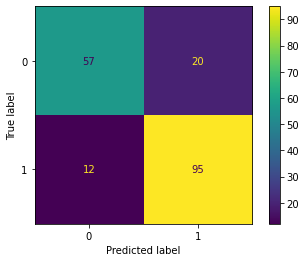

In [60]:
plot_confusion_matrix(grid, X_test_sc, y_test);

### Random forest model:

In [61]:
class_forest = RandomForestClassifier(n_estimators = 6, criterion = 'gini', random_state = 0)
class_forest.fit(X_train_sc, y_train)
preds_class = class_forest.predict(X_test_sc)

In [62]:
val_train = round(class_forest.score(X_train_sc, y_train),2)*100
val_test = round(class_forest.score(X_test_sc, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 99.0%
Test Set Accuracy: 83.0%


In [64]:
pred = class_forest.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        77
           1       0.87      0.83      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



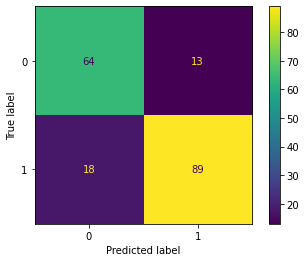

In [63]:
plot_confusion_matrix( class_forest,X_test_sc, y_test);

### Tuning the model using Grid search:

In [65]:
# Classification
param_grid = {
    "n_estimators": [10,20,30], 
    "criterion": ["gini", "entropy"], 
    "max_depth": [2,4,6] 
}
grid = GridSearchCV(
    class_forest,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=6, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6], 'n_estimators': [10, 20, 30]},
             verbose=1)

In [66]:
grid.best_score_

0.8814462771409934

In [67]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 20}

In [68]:
pred = grid.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.81        77
           1       0.84      0.92      0.88       107

    accuracy                           0.85       184
   macro avg       0.86      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



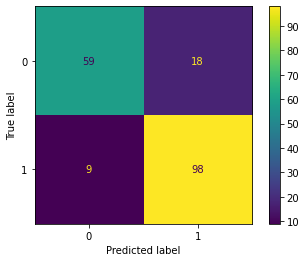

In [69]:
plot_confusion_matrix( grid,X_test_sc, y_test);